# **Análisis de mensajes sarcásticos**
##Hito 2

###Nicolás García - Javier Lavados - José Triviño - Pablo Gutiérrez - Sebastián Salinas


#**Introducción**

El sarcasmo es una forma de comunicación mediante la cual las personas expresan información que debe ser interpretada con el sentido contrario a su significado literal, usualmente con un fin humorístico o de burla. El sarcasmo es principalmente distinguido a través del tono de voz empleado, y depende en gran parte del contexto en el cual se utiliza. La identificación del sarcasmo en datos de texto es uno de los grandes desafíos en el procesamiento de lenguajes naturales (PLN), el cual se ocupa de la formulación e investigación de mecanismos eficaces computacionalmente para la comunicación entre personas y máquinas por medio del lenguaje natural, en contraposición a los lenguajes de programación.


Reddit es una red social en la cual los usuarios pueden participar subiendo texto, imágenes, videos o enlaces a distintas comunidades organizadas por tema, también conocidas como “subreddits”, que cubren una gran variedad de tópicos como noticias, política, ciencia, películas, videojuegos específicos, etc. Cada post cuenta con su propia sección de comentarios, donde los usuarios pueden opinar sobre el post en cuestión.


Una convención frecuentemente utilizada en esta red social consiste en escribir “/s” al final de un comentario si este debe ser interpretado de forma sarcástica, lo cual sirve para remover cualquier ambigüedad acerca de la naturaleza de este, efectivamente implicando que el usuario desea transmitir el sentimiento opuesto a lo comentado.


El propósito de este estudio consiste en analizar el contenido de un [dataset de comentarios sarcásticos de Reddit](https://www.kaggle.com/danofer/sarcasm), utilizando una base de datos con 1.3 millones de comentarios marcados con la etiqueta “/s”, cada uno con el comentario padre correspondiente, contando además con el subreddit del cual fueron extraídos, otorgando así un mayor contexto acerca del tema que está siendo abordado en la conversación.

#**Motivación**

El procesamiento de lenguajes naturales (abreviado PLN) es un campo de las ciencias de la computación, de la inteligencia artificial y de la lingüística que estudia las interacciones entre las computadoras y el lenguaje humano. Se ocupa de la formulación e investigación de mecanismos eficaces computacionalmente para la comunicación entre personas y máquinas por medio del lenguaje natural. Una de las principales dificultades en esta disciplina es la inherente ambigüedad presente en las lenguas naturales, tanto a nivel léxico (una palabra puede tener varios significados distintos) o estructural (construcción de árboles sintácticos). En el nivel pragmático, una oración puede no necesariamente significar lo que realmente se está diciendo, y elementos como el sarcasmo pueden alterar completamente el significado de una oración.

El sarcasmo como elemento es transmitido principalmente a través del tono de voz empleado, por lo que expresarlo mediante texto puede resultar complicado para los humanos, y aún más complicado puede ser interpretarlo para una máquina. El propósito de este análisis es realizar un estudio donde se puedan encontrar patrones que permitan caracterizar un comentario sarcástico de otros que no lo son, obteniendo información importante para deducir como una máquina podría en un futuro detectar sarcasmo.

#**Exploración de datos - Hito 1**

La exploración de datos correspondiente al Hito 1 se llevó a cabo sobre la base de datos con comentarios sarcásticos mencionada en la introducción. Lo primero que se realizó fue una revisión inicial del dataset para comprender cómo están estructurados los datos. Esto significa, entender cuantos datos son, cuantas columnas, qué describe cada columna, el tipo de datos de las columnas, entre otras cosas.

In [ ]:
# activate R magic
%load_ext rpy2.ipython

The rpy2.ipython extension is already loaded. To reload it, use:
  %reload_ext rpy2.ipython


In [ ]:
### Importación del dataset descargado localmente
%%R
library(tidyverse)
sarcasmo <- read_csv("train-balanced-sarcasm.csv")



── Column specification ────────────────────────────────────────────────────────
cols(
  label = col_double(),
  comment = col_character(),
  author = col_character(),
  subreddit = col_character(),
  score = col_double(),
  ups = col_double(),
  downs = col_double(),
  date = col_character(),
  created_utc = col_datetime(format = ""),
  parent_comment = col_character()
)

|==================================================================| 100% 243 MB


###**Atributos del dataset**

Con la función ```head``` se analizaros los primeros datos del dataset y los encabezados de cada atributo. Esto sirvió para llevar a cabo un análisis inicial y verificar que los datos fueron cargados de forma exitosa.

In [ ]:
%%R
head(sarcasmo)


# A tibble: 6 x 10
  label comment     author subreddit score   ups downs date  created_utc        
  <dbl> <chr>       <chr>  <chr>     <dbl> <dbl> <dbl> <chr> <dttm>             
1     0 "NC and NH… Trump… politics      2    -1    -1 2016… 2016-10-16 23:55:23
2     0 "You do kn… Shbsh… nba          -4    -1    -1 2016… 2016-11-01 00:24:10
3     0 "They were… Creep… nfl           3     3     0 2016… 2016-09-22 21:45:37
4     0 "This meme… icebr… BlackPeo…    -8    -1    -1 2016… 2016-10-18 21:03:47
5     0 "I could u… cush2… MaddenUl…     6    -1    -1 2016… 2016-12-30 17:00:13
6     0 "I don't p… only7… AskReddit     0     0     0 2016… 2016-09-02 10:35:08
# … with 1 more variable: parent_comment <chr>


###**Eliminación de valores nulos**

Para revisar la presencia de valores inexistentes en el dataset se utilizó la función is.na(), la cual retorna un valor de verdad dependiendo si el dato es nulo o no. Se realizó la operación suma sobre estos valores booleanos, donde un total de 0 indica que no se encontraron valores TRUE en el dataset, indicando que no hay datos inexistentes en las columnas.

In [ ]:
%%R
# Suma de valores NA en todas las columnas del dataset
sum(is.na(sarcasmo$comment))
sum(is.na(sarcasmo$author))
sum(is.na(sarcasmo$subreddit))
sum(is.na(sarcasmo$score))
sum(is.na(sarcasmo$ups))
sum(is.na(sarcasmo$downs))
sum(is.na(sarcasmo$date))
sum(is.na(sarcasmo$created_utc))
sum(is.na(sarcasmo$parent_comment))


# Mostrar existencia de filas con valores NA (notar que no son las que tienen como mentario el string '0', si no las que tienen datos NA)
sarcasmo[sarcasmo$comment == 0,]


# A tibble: 59 x 10
   label comment author    subreddit score   ups downs date  created_utc        
   <dbl> <chr>   <chr>     <chr>     <dbl> <dbl> <dbl> <chr> <dttm>             
 1     0 0       Anxietyf… pokemongo     6    -1    -1 2016… 2016-12-26 00:27:13
 2    NA <NA>    <NA>      <NA>         NA    NA    NA <NA>  NA                 
 3    NA <NA>    <NA>      <NA>         NA    NA    NA <NA>  NA                 
 4    NA <NA>    <NA>      <NA>         NA    NA    NA <NA>  NA                 
 5    NA <NA>    <NA>      <NA>         NA    NA    NA <NA>  NA                 
 6    NA <NA>    <NA>      <NA>         NA    NA    NA <NA>  NA                 
 7    NA <NA>    <NA>      <NA>         NA    NA    NA <NA>  NA                 
 8     0 0       sleeplyb… pcmaster…     1     1     0 2016… 2016-05-22 01:30:49
 9    NA <NA>    <NA>      <NA>         NA    NA    NA <NA>  NA                 
10    NA <NA>    <NA>      <NA>         NA    NA    NA <NA>  NA                 
# … with

Como se puede observar se encontraron valores vacíos. Por lo tanto, con el objetivo de limpiar el dataset se eliminaron las filas con valores nulos.

In [ ]:
%%R
sarcasmo=sarcasmo[is.na(sarcasmo$author)==FALSE,]
head(sarcasmo)


# A tibble: 6 x 10
  label comment     author subreddit score   ups downs date  created_utc        
  <dbl> <chr>       <chr>  <chr>     <dbl> <dbl> <dbl> <chr> <dttm>             
1     0 "NC and NH… Trump… politics      2    -1    -1 2016… 2016-10-16 23:55:23
2     0 "You do kn… Shbsh… nba          -4    -1    -1 2016… 2016-11-01 00:24:10
3     0 "They were… Creep… nfl           3     3     0 2016… 2016-09-22 21:45:37
4     0 "This meme… icebr… BlackPeo…    -8    -1    -1 2016… 2016-10-18 21:03:47
5     0 "I could u… cush2… MaddenUl…     6    -1    -1 2016… 2016-12-30 17:00:13
6     0 "I don't p… only7… AskReddit     0     0     0 2016… 2016-09-02 10:35:08
# … with 1 more variable: parent_comment <chr>


### **Dimensiones del dataset**

In [ ]:
%%R
dim(sarcasmo)

[1] 1010826      10


La función ```summary``` aplica estadísticas a cada columna. En particular, indica el promedio, mediana, quantiles, máximo, mínimo, entre otros. 

In [ ]:
%%R
summary(sarcasmo)


     label       comment             author           subreddit        
 Min.   :0.0   Length:1010826     Length:1010826     Length:1010826    
 1st Qu.:0.0   Class :character   Class :character   Class :character  
 Median :0.5   Mode  :character   Mode  :character   Mode  :character  
 Mean   :0.5                                                           
 3rd Qu.:1.0                                                           
 Max.   :1.0                                                           
     score               ups               downs             date          
 Min.   :-507.000   Min.   :-507.000   Min.   :-1.0000   Length:1010826    
 1st Qu.:   1.000   1st Qu.:   0.000   1st Qu.: 0.0000   Class :character  
 Median :   2.000   Median :   1.000   Median : 0.0000   Mode  :character  
 Mean   :   6.886   Mean   :   5.499   Mean   :-0.1459                     
 3rd Qu.:   4.000   3rd Qu.:   3.000   3rd Qu.: 0.0000                     
 Max.   :9070.000   Max.   :5163.000   M

## **Exploración de datos sobre los comentarios sarcásticos**
El punto de partida para la exploración de datos fue averiguar cuales eran las palabras más recurrentes en los comentarios sarcasticos y en los comentarios padre, los cuales no contienen la etiqueta “/s”.

Dicho esto, la forma más tradicional de representar texto es considerar cada palabra de cada comentario como una columna del dataset, ya que como se mencionó previamente, la idea principal es considerar si aparece o no una palabra en cierto comentario o cuántas veces aparece en él.

Utilización de la librería ``tm``, la cual permite realizar _text mining_ en R:

In [ ]:
%%R
install.packages("tm")

In [ ]:
%%R
library(tm)

Se convierten los vectores de comentarios sarcasticos en unos que puedan ser leídos por ``tm``, donde habrán tantos documentos como comentarios. Luego, se crea un Corpus o colección de documentos.

In [ ]:
%%R
docs <- VectorSource(sarcasmo[,c("comment")])
docs <- VCorpus(docs)


Al ejecutar la siguiente instrucción, se puede ver de forma resumida la composición del Corpus o colección de documentos

In [ ]:
%%R
inspect(docs)


<<VCorpus>>
Metadata:  corpus specific: 0, document level (indexed): 0
Content:  documents: 1

$comment
<<PlainTextDocument>>
Metadata:  7
Content:  chars: NA



### **Pre-procesamiento de texto**
En un comienzo, el contenido de cada documento de la colección contendrá mucha información que de momento no es relevante, ya que si bien existen bastantes elementos claves al momento de transmitir el sarcasmo, como los tipos de puntuación, la diferenciación entre mayúsculas y minúsculas, entre otros, para esta primera exploración solo se consideró la frecuencia de las palabras por sobre otras características. Por ello, fue necesario efectuar el pre-procesamiento y limpieza de los datos.

In [ ]:
#### Remover puntuación
%%R
docs <- tm_map(docs, removePunctuation)


In [ ]:
#### Remover números
%%R
docs <- tm_map(docs, removeNumbers)



In [ ]:
#### Convertir a minúscula
%%R
docs <- tm_map(docs, content_transformer(tolower))



In [ ]:
#### Eliminar espacios en blanco innecesarios
%%R
docs <- tm_map(docs, stripWhitespace)


In [ ]:
#### Reemplazar caracteres específicos
%%R
docs <- tm_map(docs, content_transformer(gsub), pattern = "/", replacement = "")
docs <- tm_map(docs, content_transformer(gsub), pattern = '[[:digit:]]+', replacement = "")  # elimina cualquier digito


In [ ]:
#### Eliminar tildes (A pesar que los comentarios están en inglés, nunca está de más prevenir)
%%R
docs <- tm_map(docs, content_transformer(iconv), from="UTF-8",to="ASCII//TRANSLIT")


In [ ]:
#### Remover caracteres especiales no considerados por ```removePunctuation```
%%R
removeSpecialChars <- function(x) gsub("[^a-zA-Z0-9 ]","",x)
docs <- tm_map(docs, content_transformer(removeSpecialChars))


### **Matriz Documento-término**

Una forma tradicional de representar los datos es mediante una matriz. La idea principal es considerar cada documento como una fila, la cual a su vez tiene tantas columnas como términos existan en el corpus completo de documento (no por documento). De esta forma, se puede saber cuáles términos se repiten entre documentos.

Para esto, se utilizará la función ``DocumentTermMatrix``, la cual empleará nuestra colección completa de documentos:

In [ ]:
%%R
dtm <- DocumentTermMatrix(docs)
inspect(dtm)


<<DocumentTermMatrix (documents: 1, terms: 192640)>>
Non-/sparse entries: 192640/0
Sparsity           : 0%
Maximal term length: 10000
Weighting          : term frequency (tf)
Sample             :
    Terms
Docs    and   are   but   for  have   its   that    the  this    you
   1 173674 67737 78880 96672 67143 65855 140695 396234 77714 171491


In [ ]:
### Transformar la DocumentTermMatrix en una matriz "visualizable"
%%R
dtm.matrix <- as.matrix(dtm) 


### **Términos más frecuentes presentes en los comentarios sacásticos**

A continuación se hará una exploración de las palabras más frecuentes en el dataset, considerando los comentarios principales y sus comentarios padre. Para esto, se creó un dataframe con 2 columnas, una para el término y otra para la cantidad de veces que aparece en la colección completa:

#### **Palabras más frecuentes de los comentarios sarcásticos**

In [ ]:
%%R
freq <- colSums(dtm.matrix)
word_freq <- data.frame(word = names(freq), freq = freq, row.names = NULL)
word_freq <- word_freq[order(-word_freq$freq),]


In [ ]:
#Importación de la librería ggplot2 para graficar en R:
%%R
library(ggplot2)



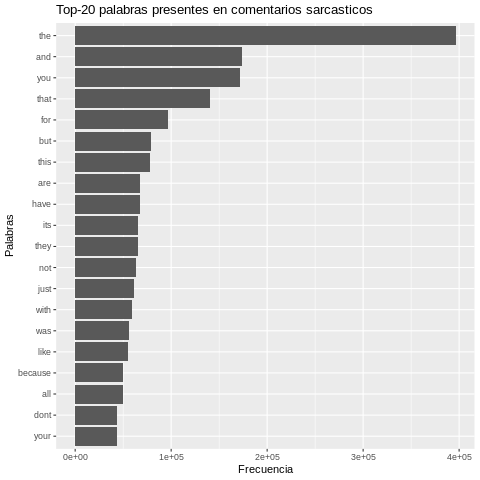

In [ ]:
### Graficar términos más frecuentes presentes en los comentarios sarcasticos
%%R
ggplot(word_freq[1:20,], aes(x = reorder(word, freq), y = freq)) +
          geom_bar(stat = "identity") + 
          coord_flip()+
          ggtitle(label = "Top-20 palabras presentes en comentarios sarcasticos") + xlab("Palabras") + ylab("Frecuencia")


Como es posible apreciar, la mayoría de estas palabras son aquellas que no entregan mayor significado a los documentos. Por ejemplo, artículos o preposiciones. Para solucionar este problema, podemos considerar una bolsa de palabras comunes llamada ``stopwords``. Por lo tanto, se eliminarán estas palabras sobre el corpus original de documentos para luego calcular la matriz nuevamente.

In [ ]:
#### Remover stopwords:
%%R
docs <- tm_map(docs, removeWords, stopwords("english"))


In [ ]:
%%R
dtm.sw <- DocumentTermMatrix(docs)
dtm.sw.matrix <- as.matrix(dtm.sw)
freq.sw <- colSums(dtm.sw.matrix)
word_freq.sw <- data.frame(word = names(freq.sw), freq = freq.sw, row.names = NULL)
word_freq.sw <- word_freq.sw[order(-word_freq.sw$freq),]


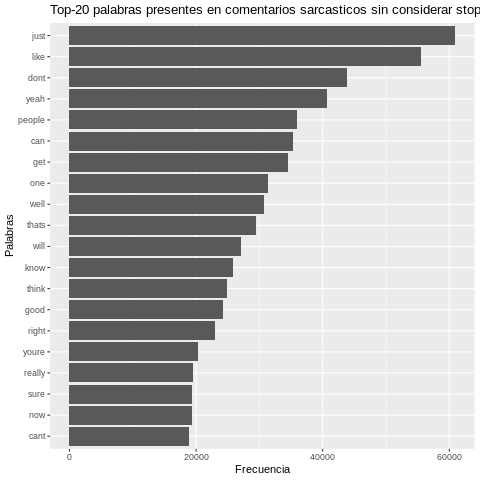

In [ ]:
#### Volver a graficar términos más frecuentes presentes en los comentarios sarcasticos, esta vez sin considerar stopwords

%%R
ggplot(word_freq.sw[1:20,], aes(x = reorder(word, freq), y = freq)) +
          geom_bar(stat = "identity") + 
          coord_flip()+
          ggtitle(label = "Top-20 palabras presentes en comentarios sarcasticos sin considerar stopwords")  + xlab("Palabras") + ylab("Frecuencia")


#### **Palabras más frecuentes de los comentarios padre**

In [ ]:

%%R
docs <- VectorSource(sarcasmo[,c("parent_comment")])
docs <- VCorpus(docs)
inspect(docs)


<<VCorpus>>
Metadata:  corpus specific: 0, document level (indexed): 0
Content:  documents: 1

$parent_comment
<<PlainTextDocument>>
Metadata:  7
Content:  chars: 134796790



In [ ]:
### Pre-procesamiento de texto

#### Remover puntuación
%%R
docs <- tm_map(docs, removePunctuation)


In [ ]:
####  Remover números
%%R
docs <- tm_map(docs, removeNumbers)


In [ ]:
#### Convertir a minúscula
%%R
docs <- tm_map(docs, content_transformer(tolower))


In [ ]:
#### Eliminar espacios en blanco innecesarios
%%R
docs <- tm_map(docs, stripWhitespace)


In [ ]:
#### Reemplazar caracteres específicos
%%R
docs <- tm_map(docs, content_transformer(gsub), pattern = "/", replacement = "")
docs <- tm_map(docs, content_transformer(gsub), pattern = '[[:digit:]]+', replacement = "")  # elimina cualquier digito


In [ ]:
#### Eliminar tildes
%%R
docs <- tm_map(docs, content_transformer(iconv), from="UTF-8",to="ASCII//TRANSLIT")


In [ ]:
#### Remover caracteres especiales no considerados por ```removePunctuation```
%%R
removeSpecialChars <- function(x) gsub("[^a-zA-Z0-9 ]","",x)
docs <- tm_map(docs, content_transformer(removeSpecialChars))


In [ ]:
### Matriz Documento-término
%%R
dtm <- DocumentTermMatrix(docs)
inspect(dtm)


<<DocumentTermMatrix (documents: 1, terms: 287500)>>
Non-/sparse entries: 287500/0
Sparsity           : 0%
Maximal term length: 40000
Weighting          : term frequency (tf)
Sample             :
    Terms
Docs    and    are    but    for   have   that    the   this   with    you
   1 498319 149340 146083 238426 156306 304238 945194 189168 158169 297746


In [ ]:
### Transformar la DocumentTermMatrix en una matriz "visualizable"
%%R
dtm.matrix <- as.matrix(dtm) 


In [ ]:
#### Términos más frecuentes presentes en los comentarios padre
%%R
freq <- colSums(dtm.matrix)
word_freq <- data.frame(word = names(freq), freq = freq, row.names = NULL)
word_freq <- word_freq[order(-word_freq$freq),]


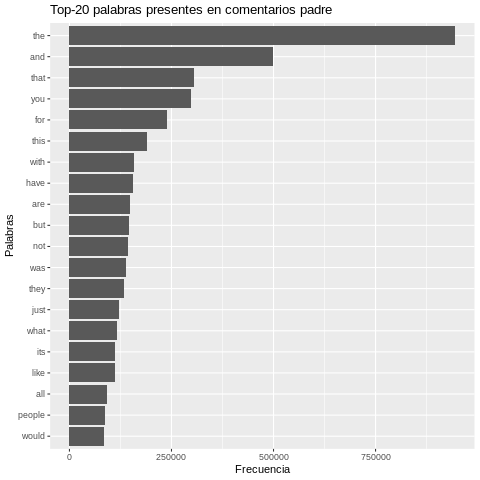

In [ ]:
### Graficamos términos más frecuentes presentes en los comentarios padre
%%R
ggplot(word_freq[1:20,], aes(x = reorder(word, freq), y = freq)) +
          geom_bar(stat = "identity") + 
          coord_flip()+
          ggtitle(label = "Top-20 palabras presentes en comentarios padre") + xlab("Palabras") + ylab("Frecuencia")


In [ ]:
#### Remover stopwords:
%%R
docs <- tm_map(docs, removeWords, stopwords("english"))


In [ ]:

%%R
dtm.sw <- DocumentTermMatrix(docs)
dtm.sw.matrix <- as.matrix(dtm.sw)
freq.sw <- colSums(dtm.sw.matrix)
word_freq.sw <- data.frame(word = names(freq.sw), freq = freq.sw, row.names = NULL)
word_freq.sw <- word_freq.sw[order(-word_freq.sw$freq),]


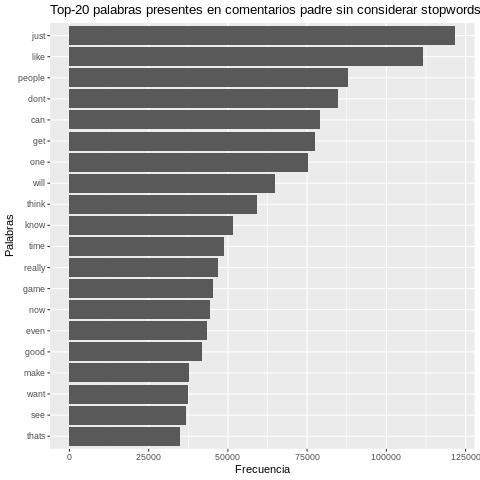

In [ ]:
### Volver a graficar términos más frecuentes presentes en los comentarios padre, esta vez sin considerar stopwords

%%R
ggplot(word_freq.sw[1:20,], aes(x = reorder(word, freq), y = freq)) +
          geom_bar(stat = "identity") + 
          coord_flip()+
          ggtitle(label = "Top-20 palabras presentes en comentarios padre sin considerar stopwords") + xlab("Palabras") + ylab("Frecuencia")


Haciendo una comparación entre los graficos sin stopwords para ambos tipos de comentarios, se puede notar que las palabras más utilizadas resultan ser bastante similares (a excepción de un par, como la expresión "yeah", que toma más relevancia en comentarios sarcasticos), y que por el lado de las frecuencias, si bien se aprecian leves cambios en el orden, en general son similares en frecuencia para ambos tipos de comentario.

Esto nos da distintas posibilidades respecto a los comentarios sarcásticos, ya que podría indicarnos que la mayoría de comentarios sarcásticos suelen mencionar las mismas palabras que contiene el comentario padre (Ya sea por énfasis, burla, etc.) o también indicar que algunos comentarios sarcásticos son respuestas de otros comentarios sarcásticos, lo cuál podría dificultar el estudio de este tipo de comentarios.

A partir de esto se puede intentar buscar una correlación entre palabras en un comentario y la clase de este (si es sarcástico o no). O incluso investigar si es que existe una doble correlación, es decir, que un comentario sarcástico implique la presencia de ciertas palabras, y que se tenga lo inverso, que la presencia de ciertas palabras resulte indicativa de un comentario sarcástico. Se podría buscar la presencia de estas palabras en ambos tipos de comentarios y después entrenar un clasificador para ver si en verdad puede predecir la naturaleza del comentario.

Otra conclusión que se puede hacer es sobre el uso de la puntuación y las mayúsculas. Pese a que se eliminaron puntuaciones, letras mayúsculas, y otros strings que entorpezcan el estudio de datos, notamos que gran parte de los comentarios del dataset utilizan muy frecuentemente estos strings con el fin de "exagerar" o "enfatizar" el sarcasmo de los comentarios estudiados. Es necesario realizar un estudio más exhaustivo de estos tipos de mensajes, y ver si existe una relación entre cantidad de mayúsculas y otras puntuaciones dentro de un mensaje con sarcasmo.

## **Exploración posterior**

Para el hito 1 se realizó un análisis de los comentarios sarcásticos a través del tiempo. Sin embargo, se recibió feedback por parte del cuerpo docente, y se concluyó que esta pregunta se era trivial y no podía ser respondida utilizando técnicas de minería de datos, por lo que para este hito se decidió descartar esta parte de la exploración. 

Durante el hito anterior también se exploraron los subreddits que presentaban mayor frecuencia dentro del dataset. Estos datos fueron utilizados para deteminar los subreddits que serían utilizados para entrenar clasificadores durante el hito actual.


### **Subreddits más recurrentes en los comentarios sarcásticos**
Observando la columna “subreddit” es posible ver que ciertos tópicos se repiten, es por esto que una buena idea sería realizar una exploración de datos para cuantificar cuales subreddits son los más repetidos en el dataset. Es decir, cuantificar la cantidad de comentarios sarcasticos que tiene cada subreddit presente en el dataset, lo que es equivalente a encontrar los subreddits que son más propensos a tener comentarios sarcasticos.


In [ ]:
%%R
docs <- VectorSource(sarcasmo[,c("subreddit")])
docs <- VCorpus(docs)
inspect(docs)


<<VCorpus>>
Metadata:  corpus specific: 0, document level (indexed): 0
Content:  documents: 1

$subreddit
<<PlainTextDocument>>
Metadata:  7
Content:  chars: 9320529



In [ ]:
### Matriz Documento-término

%%R
dtm <- DocumentTermMatrix(docs)
inspect(dtm)


<<DocumentTermMatrix (documents: 1, terms: 14876)>>
Non-/sparse entries: 14876/0
Sparsity           : 0%
Maximal term length: 21
Weighting          : term frequency (tf)
Sample             :
    Terms
Docs askreddit funny leagueoflegends  news   nfl pcmasterrace  pics politics
   1     65677 17939           21037 16891 14150        18988 16154    39496
    Terms
Docs todayilearned worldnews
   1         14161     26377


In [ ]:
### Transformar la DocumentTermMatrix en una matriz "visualizable"

%%R
dtm.matrix <- as.matrix(dtm) 


In [ ]:
### subreddits más presentes en el dataset
%%R
freq <- colSums(dtm.matrix)
subreddit_freq <- data.frame(subreddit = names(freq), freq = freq, row.names = NULL)
subreddit_freq <- subreddit_freq[order(-subreddit_freq$freq),]
head(subreddit_freq)


            subreddit  freq
905         askreddit 65677
10087        politics 39496
14568       worldnews 26377
7267  leagueoflegends 21037
9638     pcmasterrace 18988
5061            funny 17939


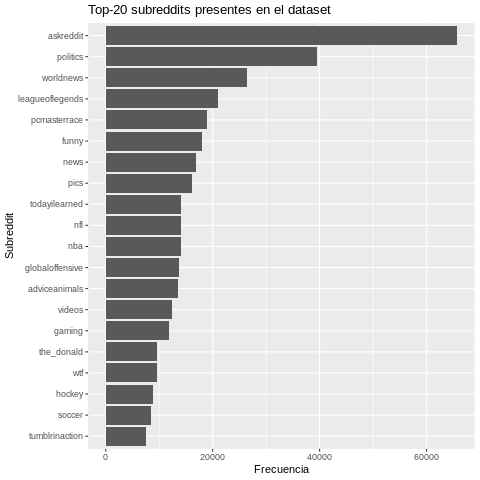

In [ ]:
### Graficar subreddits más frecuentes en los comentarios sarcasticos del dataset
%%R
ggplot(subreddit_freq[1:20,], aes(x = reorder(subreddit, freq), y = freq)) +
          geom_bar(stat = "identity") + 
          coord_flip()+
          ggtitle(label = "Top-20 subreddits presentes en el dataset")  + xlab("Subreddit") + ylab("Frecuencia")


A partir de este análisis se puede concluir que los subreddits con mayor presencia en el dataset son bastante variados, abarcando tanto temas serios como política o noticias como temas lúdicos como League of Legends o deportes.

### **Cantidad de caracteres por comentario sarcastico**

Otra exploración que se puede realizar y que puede servier para encontrar una relación entre si un comentario es sarcastico o no, es identificar la cantidad de caracteres que posee, o dicho de otra forma, encontrar el largo del comentario, además de también conocer estadísticas sobre el largo en palabras de los comentarios, tales como el promedio, el máximo y mínimo.


# A tibble: 56 x 10
   label comment    author subreddit score   ups downs date  created_utc        
   <dbl> <chr>      <chr>  <chr>     <dbl> <dbl> <dbl> <chr> <dttm>             
 1     0 DONALD TR… Sage2… circleje…     2    -1    -1 2016… 2016-10-04 04:42:48
 2    NA <NA>       <NA>   <NA>         NA    NA    NA <NA>  NA                 
 3    NA <NA>       <NA>   <NA>         NA    NA    NA <NA>  NA                 
 4    NA <NA>       <NA>   <NA>         NA    NA    NA <NA>  NA                 
 5    NA <NA>       <NA>   <NA>         NA    NA    NA <NA>  NA                 
 6    NA <NA>       <NA>   <NA>         NA    NA    NA <NA>  NA                 
 7    NA <NA>       <NA>   <NA>         NA    NA    NA <NA>  NA                 
 8    NA <NA>       <NA>   <NA>         NA    NA    NA <NA>  NA                 
 9    NA <NA>       <NA>   <NA>         NA    NA    NA <NA>  NA                 
10    NA <NA>       <NA>   <NA>         NA    NA    NA <NA>  NA                 
# … with

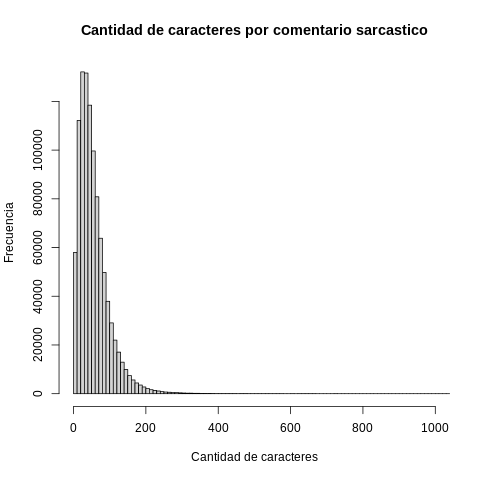

In [ ]:
%%R
Length_comment=str_length(sarcasmo$comment)
hist(Length_comment,xlim=c(0,1000), breaks = 1000, main = "Cantidad de caracteres por comentario sarcastico", 
     xlab = "Cantidad de caracteres", ylab = "Frecuencia" )


# Resumen de estadísticas del largo de los comentarios sarcasticos
summary(Length_comment)

sarcasmo[str_length(sarcasmo$comment) == 10000,]


   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
    1.0    42.0    75.0   133.3   144.0 40301.0 


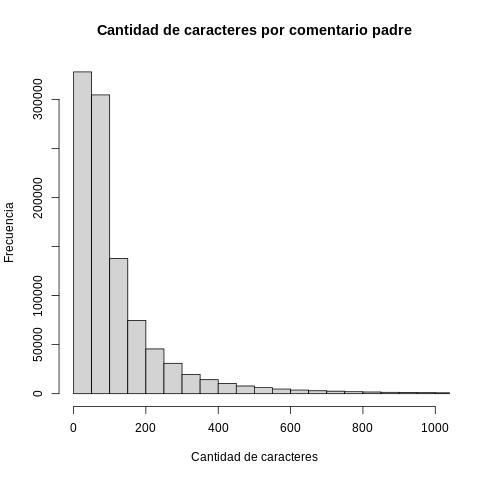

In [ ]:
## Cantidad de carácteres por comentario padre

%%R
Lenght_parent=str_length(sarcasmo$parent_comment)
hist(Lenght_parent,xlim=c(0,1000), breaks = 1000, main = "Cantidad de caracteres por comentario padre",
     xlab = "Cantidad de caracteres", ylab = "Frecuencia" )

# Resumen de estadísticas del largo de los comentarios padre
summary(Lenght_parent)


Analizando las estadísticas sobre el largo de ambos tipos de comentarios se puede notar la presencia de outliers, ya que en el caso de los comentarios sarcasticos se tiene un promedio de 56,69 caracteres y una mediana de 46 caracteres, pero un máximo de 10000.

Esto nos dice que existe al menos un comentario sarcastico que contiene 10.000 caracteres. Realizando la consulta adecuada se pudo observar que son tres los comentarios que alcanzan los 10000 caracteres, y uno de ellos es una secuencia que repite el nombre Donald Trump una gran cantidad de veces, llegando a generar un comentario de 10000 caracteres.

Este comentario se aleja excesivamente de las medidas de tendencia central y por ende es un outlier que afecta a estadisticas que no son robustas, como el promedio. Algo similar pasa en el caso de los comentarios padres, donde se tiene un promedio de 133.4 caractes y una mediana de 75 caracteres, pero un máximo de 40301.

Es por esto que con el objetivo de facilitar la visualización de los datos se realizó un zoom a los dos graficos generados, ya que debido a la presencia de outliers las escalas de los graficos quedaban muy extensas.

Haciendo una compración entre los dos gráficos es posible observar que los comentarios sarcasticos se encuentran en un rango entre 0 a 400 caracteres, con una mediana de 46 caracteres. Y que los comentarios padres se encuentran en un rango entre 0 y un poco más de 1000 caracteres, con una mediana de 75 caracteres. Lo que nos dice que en general los comentarios padre son más largos que los comentarios sarcasticos. Sin embargo para ambos tipos de comentario, la mayor concentración de datos está entre los 0 a 200 caracteres.

# **Exploración de datos - Hito 2**

Para realizar la exploración de datos en este hito, se obtuvo una nueva base de datos con [comentarios de *Reddit* de todo tipo](https://www.kaggle.com/smagnan/1-million-reddit-comments-from-40-subreddits). Dado que la cantidad total de comentarios es demasiado grande para poder estudiarlos a profundidad, se decidió tomar de ambos datasets (Hito 1 e Hito 2) los comentarios provenientes de los 5 subreddits con mayor cantidad de comentarios.

Para poder construir nuestro nuevo dataset, se preprocesaron los datos como se indica a continuación:
- Se Filtró del primer dataset los subrredits con más comentarios sarcásticos (hecho en Excel),
- Se eliminaron los comentarios sarcásticos del nuevo dataset, dado que estos ya se tenían en la tabla original y se buscaba evitar duplicaciones en los datos,
- Se eliminaron atributos que no coinciden con el nuevo dataset o que no brindan mucha información, tales como *Author*, *ups*, *downs*, *date*, *created_utc* y *parent_comment*,
- Se juntaron e etiquetaron todos los comentarios de ambas tablas, agregando un nuevo atributo bajo el nombre de “sarcasm”, cuyo valor puede ser “yes” (si provienen del primer dataset) o “no” (si provienen del nuevo dataset), denotando si el comentario es sarcástico o no. 

El análisis de estos datos se llevó a cabo utilizando la librería pandas. A continuación se adjuntan las importaciones realizadas:

In [ ]:
# Librerias principales para la exploración:
import csv
import pandas as pd
import numpy as np

# Clasificadores usados en la exploración:
from sklearn.svm import SVC
from sklearn.svm import LinearSVC  # Support Vector Machine para strings
from sklearn.tree import DecisionTreeClassifier
from sklearn.dummy import DummyClassifier
from sklearn.neighbors import KNeighborsClassifier

El paso inicial para comenzar el análisis de los datos fue cargar los datos correspondientes desde un documento en Excel con el comentario, el subreddit y un indicador que nos informa si el comentario es sarcástico o no.

In [ ]:
yes_or_no = pd.read_excel("DatosHito2.xlsx")
yes_or_no.head()

,comment,subreddit,score,sarcasm
0,"I don't pay attention to her, but as long as s...",AskReddit,0,yes
1,Trick or treating in general is just weird...,AskReddit,1,yes
2,what the fuck,AskReddit,22,yes
3,This would make me cry.,AskReddit,1,yes
4,My stuffed animal I've had since I was born.,AskReddit,1,yes


Se obtiene la información relevante a partir de esta tabla.

In [ ]:
yes_or_no.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 295218 entries, 0 to 295217
Data columns (total 13 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   comment      295218 non-null  object 
 1   subreddit    295218 non-null  object 
 2   score        295218 non-null  int64  
 3   sarcasm      295218 non-null  object 
 4   Llave        295218 non-null  object 
 5   Unnamed: 5   1 non-null       object 
 6   Unnamed: 6   10 non-null      object 
 7   Unnamed: 7   15 non-null      float64
 8   Unnamed: 8   10 non-null      float64
 9   Unnamed: 9   0 non-null       float64
 10  Unnamed: 10  2 non-null       object 
 11  Unnamed: 11  3 non-null       float64
 12  Unnamed: 12  2 non-null       float64
dtypes: float64(5), int64(1), object(7)
memory usage: 29.3+ MB


Se obtiene el número de datos para cada subreddit en la base de datos:

In [ ]:
yes_or_no["subreddit"].value_counts()

AskReddit          90658
politics           64392
worldnews          51288
leagueoflegends    45979
funny              42901
Name: subreddit, dtype: int64

Finalmente, para terminar con la carga de datos, se comparó el porcentaje de comentarios sarcásticos y no sarcásticos en los datos, obteniendo las proporciones para cada subreddit.

In [ ]:
cantAskRedditYes=len(yes_or_no[(yes_or_no['subreddit']=="AskReddit")& (yes_or_no['sarcasm']=="yes")])
cantAskRedditNo=len(yes_or_no[(yes_or_no['subreddit']=="AskReddit")& (yes_or_no['sarcasm']=="no")])

cantFunnyYes=len(yes_or_no[(yes_or_no['subreddit']=="funny")& (yes_or_no['sarcasm']=="yes")])
cantFunnyNo=len(yes_or_no[(yes_or_no['subreddit']=="funny")& (yes_or_no['sarcasm']=="no")])

cantPoliticsYes=len(yes_or_no[(yes_or_no['subreddit']=="politics")& (yes_or_no['sarcasm']=="yes")])
cantPoliticsNo=len(yes_or_no[(yes_or_no['subreddit']=="politics")& (yes_or_no['sarcasm']=="no")])

cantLeagueOfLegendsYes=len(yes_or_no[(yes_or_no['subreddit']=="leagueoflegends")& (yes_or_no['sarcasm']=="yes")])
cantLeagueOfLegendsNo=len(yes_or_no[(yes_or_no['subreddit']=="leagueoflegends")& (yes_or_no['sarcasm']=="no")])

cantWorldNewsYes=len(yes_or_no[(yes_or_no['subreddit']=="worldnews")& (yes_or_no['sarcasm']=="yes")])
cantWorldNewsNo=len(yes_or_no[(yes_or_no['subreddit']=="worldnews")& (yes_or_no['sarcasm']=="no")])

cantAskReddit=cantAskRedditYes+cantAskRedditNo
cantFunny=cantFunnyYes+cantFunnyNo
cantPolitics=cantPoliticsYes+cantPoliticsNo
cantLeagueOfLegends=cantLeagueOfLegendsYes+cantLeagueOfLegendsNo
cantWorldNews=cantWorldNewsYes+cantWorldNewsNo

print("Proporción comentarios sarcasticos en AskReddit: ", cantAskRedditYes/cantAskReddit)
print("Proporción comentarios no sarcasticos en AskReddit: ", cantAskRedditNo/cantAskReddit)

print("Proporción comentarios sarcasticos en funny: ", cantFunnyYes/cantFunny)
print("Proporción comentarios no sarcasticos en funny: ", cantFunnyNo/cantFunny)

print("Proporción comentarios sarcasticos en politics: ", cantPoliticsYes/cantPolitics)
print("Proporción comentarios no sarcasticos en politics: ", cantPoliticsNo/cantPolitics)

print("Proporción comentarios sarcasticos en leagueoflegends: ", cantLeagueOfLegendsYes/cantLeagueOfLegends)
print("Proporción comentarios no sarcasticos en leagueoflegends: ", cantLeagueOfLegendsNo/cantLeagueOfLegends)

print("Proporción comentarios sarcasticos en worldnews: ", cantWorldNewsYes/cantWorldNews)
print("Proporción comentarios no sarcasticos en worldnews: ", cantWorldNewsNo/cantWorldNews)


cantSarcastica=cantAskRedditYes+cantFunnyYes+cantPoliticsYes+cantLeagueOfLegendsYes+cantWorldNewsYes
cantNotSarcastica=cantAskRedditNo+cantFunnyNo+cantPoliticsNo+cantLeagueOfLegendsNo+cantWorldNewsNo
cantTotal=cantSarcastica+cantNotSarcastica

print("Proporción comentarios sarcasticos en el dataset: ", cantSarcastica/cantTotal)
print("Proporción comentarios no sarcasticos en el dataset: ", cantNotSarcastica/cantTotal)

Proporción comentarios sarcasticos en AskReddit:  0.7244148337708751
Proporción comentarios no sarcasticos en AskReddit:  0.2755851662291248
Proporción comentarios sarcasticos en funny:  0.41814876110113985
Proporción comentarios no sarcasticos en funny:  0.5818512388988601
Proporción comentarios sarcasticos en politics:  0.6133215306249223
Proporción comentarios no sarcasticos en politics:  0.38667846937507766
Proporción comentarios sarcasticos en leagueoflegends:  0.4574697144348507
Proporción comentarios no sarcasticos en leagueoflegends:  0.5425302855651493
Proporción comentarios sarcasticos en worldnews:  0.5142723444080487
Proporción comentarios no sarcasticos en worldnews:  0.48572765559195136
Proporción comentarios sarcasticos en el dataset:  0.5775935071709719
Proporción comentarios no sarcasticos en el dataset:  0.42240649282902804


## **Vectorización**

Un problema de la clasificación de datos sobre strings es que los clasificadores vistos hasta el momento trabajan directamente con datos numéricos y etiquetas, no con datos puramente en datos de texto. Es por esto que se decidió investigar una forma de representar numéricamente los comentarios de nuestro dataset para poder usar los modelos aprendidos, encontrando el método de la vectorización.


El método de la vectorización se basa en separar un string en tokens, los cuales son asignados a un identificador único con el fin de representar el string como un vector de unos, si el string contiene el token y cero en caso contrario. El dataset completo vectorizado será una matriz que resuma numéricamente todos los comentarios.



In [ ]:
import string
punctuation = set(string.punctuation)
digits = set(string.digits)

def tokenize(sentence):
    tokens = []
    for token in sentence.split():
        new_token = []
        #if (token not in words):
        for character in token:
            if (character not in punctuation) and (character not in digits) :
                new_token.append(character.lower())
        if new_token:
            tokens.append("".join(new_token))
    return tokens

In [ ]:
#Ejemplo de tokenización.
tokenize("We love data mining \s")

['we', 'love', 'data', 'mining', 's']

# **Preguntas y problemas**

A partir de la retroalimentación obtenida del hito 1 se concluyó que las interrogantes que se tenían no podían ser respondidas a partir de los conocimientos que se tienen hasta el momento, en específico el poder determinar si el contexto influye en el desempeño de un clasificador. Para poder verificar esto sería necesario encontrar un vínculo entre un comentario padre y un comentario hijo, lo cuál no es posible verificar dado que nuestro nuevo dataset no incluye los comentarios padre. En consecuencia, se llevó a cabo una reunión para determinar los cambios a las preguntas propuestas en el Hito 1, llegando a las siguientes interrogantes:

1. ¿A través de qué método se debe entrenar un clasificador para que presente un buen desempeño?
2. ¿Qué factores influyen más en el desempeño de un clasificador? ¿El largo del comentario? ¿Palabras utilizadas? ¿Puntaje?
3. Si se entrena un clasificador en un subreddit específico, ¿Cambia el desempeño al usar este clasificador en un subreddit distinto?


# **Propuesta Experimental**
Se agregaron datos nuevos al dataset con comentarios no sarcásticos provenientes de los 5 subreddits más populares. Estos datos fueron preprocesados y se llevó a cabo una limpieza de estos datos, como se describió en la sección anterior. Luego de realizado el preprocesamiento se incorporaron estos datos a la tabla original, generando una nueva tabla con todo tipo de comentarios y una columna que denota si el comentario es sarcástico o no.


## **Pregunta 1**
Para responder la primera pregunta:
- Se segmentará el dataset en distintos subreddits,

- Se procede a separar el dataset en grupos de training y testing para entrenar distintos clasificadores, los tipos de clasificadores utilizados para el entrenamiento serán: *Decision Tree*, *Support Vector Machine Classifier*, *Linear Support Vector Machine Classifier*, *K-Nearest Neighbours* y *Dummy Classifier*.

- Después de entrenar los datos, se comparará el accuracy para determinar si el clasificador presenta un buen desempeño




## **Pregunta 2**
Para responder la segunda pregunta, se llevarán a cabo distintos experimentos:
- Se filtrarán los comentarios bajo o sobre una cierta longitud y se llevará a cabo el entrenamiento sobre estos datos para determinar si el desempeño presenta algún cambio. Esto con el fin de verificar la importancia del largo sobre los clasificadores.
- Analogamente, se filtrarán ciertas palabras con el mismo objetivo de determinar si el desempeño de los clasificadores se ve afectado o no. Esto con el fin de verificar la importancia de ciertas palabras clave sobre los clasificadores.
- Se eliminarán columnas como el score para analizar si existen cambios en el desempeño del clasificador. Esto con el fin de verificar la importancia del score sobre los clasificadores.

## **Pregunta 3**
Para responder la tercera pregunta:
- Se filtrará el nuevo dataset para que ahora incluya solamente los subreddits *AskReddit* y *worldnews*.
- Se realizará una vectorización de este dataset en conjunto, debido a que si estos se vectorizaran por separado la información resultante contendría palabras que el otro subreddit no tiene. 

- Posterior a la vectorización, es necesario separar la información obtenida en los dos subreddits iniciales, para segmentarla en grupos de training y testing.

- Se entrenan los 5 clasificadores con los datos ya separados de ambos subreddits

- Se utilizarán los clasificadores previamente mencionados para testearlos con los grupos de testing del subreddit opuesto, esto es, que los clasificadores entrenados con *AskReddit* serán testeados con los datos de testing de *worldnews* y viceversa.

- Luego de lo anterior, se analizarán los resultados obtenidos usando la métrica *accuaracy*.

# **Experimento Preliminar - Pregunta 1**

Para nuestro experimento preliminar se decidió responder la primera pregunta, para la cual se deben entrenar distintos tipos de clasificadores sobre varios segmentos de la base de datos, y de esta forma determinar a través de cuál método se obtiene un mejor desempeño. Los clasificadores utilizados para realizar la comparación fueron:
- *Decision Tree*
- *Support Vector Machine Classifier*
- *Linear Support Vector Machine Classifier*
- *K-Nearest Neighbours*
- *Dummy Classifier*

El primer subrredit analizado fue el que contenía mayor cantidad de comentarios de todo tipo (*AskReddit*). A partir de los resultados obtenidos de los 4 clasificadores, pudimos concluir que el mejor clasificador para este experimento fue **Support Vector Machine Classifier (SVc)**, con un *accuracy* de aproximadamente un 80%.

Es importante notar que la proporción de comentarios sarcásticos sobre la cantidad total de comentarios del subreddit *AskReddit* es bastante alta (70% aproximadamente). Es por esto que, para verificar que la calidad del clasificador con mayor desempeño no depende directamente de la proporción de comentarios sarcásticos, se decidió repetir el experimento anterior sobre un nuevo subreddit con una proporción más equilibrada de comentarios sarcásticos. El subreddit elegido para esto fue *worldnews*, el cuál es el tercer subreddit con más comentarios y que presenta una proporción de comentarios sarcásticos de aproximadamente un 50%.

A partir de los resultados experimentales sobre el subreddit *worldnews*, se pudo concluir que el mejor clasificador para este tipo de problema sigue siendo **Support Vector Machine Classifier (SVc)**, con un *accuracy* prácticamente idéntico al del subreddit *AskReddit*. Cabe mencionar que las precisiones de los cuatro clasificadores usados en ambos casos fueron constantes, concluyendo que la proporción de comentarios sarcásticos sobre un subreddit no es relevante para el buen desempeño de un clasificador.


Es importante también comentar que el clasificador Support Vector Machine Classifier (SVc) tuvo un tiempo de entrenamiento notablemente alto en comparación con su equivalente lineal. Sin embargo, el aumento de *accuracy* es muy bajo por lo que se concluyo que esta leve diferencia no justificaba el gran tiempo invertido de cómputo.


Para la medición de calidad de los modelos se utilizo únicamente la métrica de *accuracy*, dado que para este experimento nos importa determinar que tan certera es la medición de sarcasmo, mientras que las métricas de *f1-measure*, *presicion* y *recall* son irrelevantes, debido a que  los falsos negativos y positivos no aportan información para el problema a resolver.

A continuación, se deja adjunta el código utilizado para realizar este experimento:


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer

## Clasificadores para AskReddit


In [ ]:

datosAskReddit=yes_or_no[yes_or_no['subreddit']=="AskReddit"]
datosAskReddit.head()


,comment,subreddit,score,sarcasm,Llave,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12
0,"I don't pay attention to her, but as long as s...",AskReddit,0,yes,AskReddityes,,AskReddityes,65674.0,0.724415,NaN,sarcasm,170516.0,0.577594
1,Trick or treating in general is just weird...,AskReddit,1,yes,AskReddityes,NaN,AskRedditno,24984.0,0.275585,NaN,nosarcasm,124702.0,0.422406
2,what the fuck,AskReddit,22,yes,AskReddityes,NaN,NaN,90658.0,NaN,NaN,NaN,295218.0,NaN
3,This would make me cry.,AskReddit,1,yes,AskReddityes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,My stuffed animal I've had since I was born.,AskReddit,1,yes,AskReddityes,NaN,funnyyes,17939.0,0.418149,NaN,NaN,NaN,NaN


In [ ]:
train_comment_A,test_comment_A, train_sarcasm_A, test_sarcasm_A = train_test_split(datosAskReddit["comment"], 
                                                                    datosAskReddit["sarcasm"],
                                                                    test_size=.33, random_state=37,
                                                                    stratify=datosAskReddit["sarcasm"])

print(f"Training examples: {len(train_comment_A)}, testing examples {len(test_comment_A)}")


Training examples: 60740, testing examples 29918


In [ ]:
real_vectorizer = CountVectorizer(tokenizer = tokenize, binary=True)
train_X_A = real_vectorizer.fit_transform(train_comment_A)
test_X_A = real_vectorizer.transform(test_comment_A)
train_X_A.shape

(60740, 39822)

###Usando Árbol de decisión

In [ ]:
classifier_Tree_Ask = DecisionTreeClassifier()
classifier_Tree_Ask.fit(train_X_A, train_sarcasm_A)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [ ]:
from sklearn.metrics import accuracy_score
predicciones_Tree_Ask = classifier_Tree_Ask.predict(test_X_A)
accuracy_Tree_Ask = accuracy_score(test_sarcasm_A, predicciones_Tree_Ask)
print(f"Accuracy: {accuracy_Tree_Ask:.4%}")

Accuracy: 76.1214%


###Usando SVC

In [ ]:

classifier_Svc_Ask = SVC(max_iter=300000)
classifier_Svc_Ask.fit(train_X_A, train_sarcasm_A)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=300000, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
from sklearn.metrics import accuracy_score
predicciones_Svc_Ask = classifier_Svc_Ask.predict(test_X_A)
accuracy_Svc_Ask = accuracy_score(test_sarcasm_A, predicciones_Svc_Ask)
print(f"Accuracy: {accuracy_Svc_Ask:.4%}")

Accuracy: 82.3317%


###Usando linearSvc

In [ ]:
classifier_LSvc_Ask = LinearSVC(max_iter=300000)
classifier_LSvc_Ask.fit(train_X_A, train_sarcasm_A)

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=300000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)

In [ ]:
from sklearn.metrics import accuracy_score
predicciones_LSvc_Ask = classifier_LSvc_Ask.predict(test_X_A)
accuracy_LSvc_Ask = accuracy_score(test_sarcasm_A, predicciones_LSvc_Ask)
print(f"Accuracy: {accuracy_LSvc_Ask:.4%}")

Accuracy: 80.3764%


###Usando K-vecinos

In [ ]:
classifier_KNN_Ask = KNeighborsClassifier(n_neighbors=10)
classifier_KNN_Ask.fit(train_X_A, train_sarcasm_A)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=10, p=2,
                     weights='uniform')

In [ ]:
from sklearn.metrics import accuracy_score
predicciones_KNN_Ask = classifier_KNN_Ask.predict(test_X_A)
accuracy_KNN_Ask = accuracy_score(test_sarcasm_A, predicciones_KNN_Ask)
print(f"Accuracy: {accuracy_KNN_Ask:.4%}")

Accuracy: 73.8051%


### Usando Dummy

In [ ]:
classifier_DummyClassifier_Ask =DummyClassifier()
classifier_DummyClassifier_Ask.fit(train_X_A, train_sarcasm_A)

In [ ]:
from sklearn.metrics import accuracy_score
predicciones_DummyClassifier_Ask = classifier_DummyClassifier_Ask.predict(test_X_A)
accuracy_DummyClassifier_Ask = accuracy_score(test_sarcasm_A,predicciones_DummyClassifier_Ask)
print(f"Accuracy: {accuracy_DummyClassifier_Ask:.4%}")

Accuracy: 59.8202%


## Clasificadores para worldnews


In [ ]:

datosWorld=yes_or_no[yes_or_no['subreddit']=="worldnews"]
datosWorld.head()


,comment,subreddit,score,sarcasm,Llave,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12
144140,all of which is irrelevant to whether or not A...,worldnews,1,yes,worldnewsyes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
144141,"The fact we are arming ""rebels"" linked to AQ i...",worldnews,-1,yes,worldnewsyes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
144142,Whilst knowing that what they were doing was i...,worldnews,1,yes,worldnewsyes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
144143,"If she's already agreed to step down, isn't th...",worldnews,2,yes,worldnewsyes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
144144,Were those who boycotted South Africa and only...,worldnews,1,yes,worldnewsyes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
train_comment_W,test_comment_W, train_sarcasm_W, test_sarcasm_W = train_test_split(datosWorld["comment"], 
                                                                    datosWorld["sarcasm"],
                                                                    test_size=.33, random_state=37,
                                                                    stratify=datosWorld["sarcasm"])

print(f"Training examples: {len(train_comment_W)}, testing examples {len(test_comment_W)}")


Training examples: 34362, testing examples 16926


In [ ]:
real_vectorizer = CountVectorizer(tokenizer = tokenize, binary=True)

train_X_W = real_vectorizer.fit_transform(train_comment_W)
test_X_W = real_vectorizer.transform(test_comment_W)

train_X_W.shape

(34362, 35032)

###Usando Arbol de decision

In [ ]:
classifier_Tree_W = DecisionTreeClassifier()
classifier_Tree_W.fit(train_X_W, train_sarcasm_W)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [ ]:
from sklearn.metrics import accuracy_score
predicciones_Tree_W = classifier_Tree_W.predict(test_X_W)
accuracy_Tree_W = accuracy_score(test_sarcasm_W, predicciones_Tree_W)
print(f"Accuracy: {accuracy_Tree_W:.4%}")

Accuracy: 71.0977%


###Usando SVC

In [ ]:
classifier_Svc_W = SVC(max_iter=300000)
classifier_Svc_W.fit(train_X_W, train_sarcasm_W)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=300000, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
from sklearn.metrics import accuracy_score
predicciones_Svc_W = classifier_Svc_W.predict(test_X_W)
accuracy_Svc_W = accuracy_score(test_sarcasm_W, predicciones_Svc_W)
print(f"Accuracy: {accuracy_Svc_W:.4%}")

Accuracy: 80.6215%


###Usando linearSvc

In [ ]:
classifier_LSvc_W = LinearSVC(max_iter=300000)
classifier_LSvc_W.fit(train_X_W, train_sarcasm_W)

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=300000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)

In [ ]:
from sklearn.metrics import accuracy_score
predicciones_LSvc_W = classifier_LSvc_W.predict(test_X_W)
accuracy_LSvc_W = accuracy_score(test_sarcasm_W, predicciones_LSvc_W)
print(f"Accuracy: {accuracy_LSvc_W:.4%}")

Accuracy: 79.2804%


###Usando K-vecinos

In [ ]:
classifier_KNN_W = KNeighborsClassifier(n_neighbors=10)
classifier_KNN_W.fit(train_X_W, train_sarcasm_W)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=10, p=2,
                     weights='uniform')

In [ ]:
from sklearn.metrics import accuracy_score
predicciones_KNN_W = classifier_KNN_W.predict(test_X_W)
accuracy_KNN_W = accuracy_score(test_sarcasm_W, predicciones_KNN_W)
print(f"Accuracy: {accuracy_KNN_W:.4%}")

Accuracy: 57.8400%


### Usando Dummy

In [ ]:
classifier_DummyClassifier_W = DummyClassifier()
classifier_DummyClassifier_W.fit(train_X_W, train_sarcasm_W)

In [ ]:
from sklearn.metrics import accuracy_score
predicciones_DummyClassifier_W = classifier_DummyClassifier_Ask.predict(test_X_W)
accuracy_DummyClassifier_W = accuracy_score(test_sarcasm_W,predicciones_DummyClassifier_W)
print(f"Accuracy: {accuracy_DummyClassifier_W:.4%}")

Accuracy: 50.8330%


#Aportes individuales
- Nicolás García: Exploración del nuevo dataset y redacción del informe (predicciones y conclusiones)
- Javier Lavados: Reducción y unión de los dataset, exploración del nuevo dataset (entrenamiento de modelos)
- José Triviño: Redacción del informe y del ppt.
- Pablo Gutiérrez: Investigación y búsqueda del nuevo dataset, además de redacción del informe.
- Sebastián Salinas: Investigación sobre vectorización y del clasificador *linearSVC*, exploración del nuevo dataset (vectorización del dataset)
